In [17]:
import numpy as np
from dtaidistance import dtw
import pandas as pd
import ast


In [2]:

rand_array = np.random.uniform(-1, 1, size=(20))
random_list = np.random.uniform(-1, 1, size=(10, 20)).tolist()

for list in random_list:
    a = np.array(rand_array)
    b = np.array(list)
    distance = dtw.distance_fast(a, b)
    print(distance)


1.8906958448979534
1.8005359147600148
1.5967050001662884
2.056862216171043
2.311164254020479
1.7144356480829352
2.1499354760588596
2.0736601837224082
2.0312486596679085
1.4535240762069797


In [45]:
random_list = np.random.uniform(-1, 1, size=(10, 20)).tolist()
rand_titles = ["Random Arc 1", "Random Arc 2", "Random Arc 3", "Random Arc 4", "Random Arc 5", "Random Arc 6", "Random Arc 7", "Random Arc 8", "Random Arc 9", "Random Arc 10"]
titles = pd.Series(rand_titles)
scores= pd.Series(random_list)
dfBooks = pd.concat([titles, scores], axis=1)
dfBooks.columns = ['Title', 'Scores']
dfBooks

dfBooks = pd.read_csv("../streamlit/data/books_final2.csv").iloc[:, 1:]
dfBooks = pd.read_parquet("../streamlit/data/gutenberg_books.parquet")
dfBooks.head(15)

,id,title,author,author_birth,author_death,txt_link,emotions,emotion_scores,summaries
0,1,The Declaration of Independence of the United ...,"Jefferson, Thomas",1743.0,1826.0,https://www.gutenberg.org/ebooks/1.txt.utf-8,"['anger', 'anger', 'anger', 'anger', 'anger', ...","[-0.8, -0.7, -0.9, -0.8, -0.9, -0.7, -0.8, -0....",['The King has refused to pass laws that are g...
1,2,The United States Bill of Rights: The Ten Orig...,United States,NaN,NaN,https://www.gutenberg.org/ebooks/2.txt.utf-8,"['Contentment', 'Empowerment', 'Relief', 'Secu...","[0.7, 0.8, 0.6, 0.9, 0.7, 0.8, 0.6, 0.7, 0.6, ...",['The Bill of Rights ensures freedom of religi...
2,3,John F. Kennedy's Inaugural Address,"Kennedy, John F. (John Fitzgerald)",1917.0,1963.0,https://www.gutenberg.org/ebooks/3.txt.utf-8,"['Hope', 'Pride', 'Determination', 'Loyalty', ...","[0.8, 0.6, 0.9, 0.7, -0.3, 0.5, 0.4, 0.5, 0.8,...","['Celebration of freedom and renewal', 'Americ..."
3,4,Lincoln's Gettysburg Address: Given November 1...,"Lincoln, Abraham",1809.0,1865.0,https://www.gutenberg.org/ebooks/4.txt.utf-8,"['Pride', 'Determination', 'Respect', 'Reveren...","[0.8, 0.9, 0.7, 1.0, 0.3, 0.9, 0.8, 0.6, 0.9, ...",['The founding fathers created a nation concei...
4,5,The United States Constitution,United States,NaN,NaN,https://www.gutenberg.org/ebooks/5.txt.utf-8,"['Pride', 'Hope', 'Determination', 'Liberty', ...","[0.5, 0.7, 0.6, 0.9, 0.4, 0.8, 0.5, 0.3, 0.4, ...",['The establishment of the United States Const...
5,6,Give Me Liberty or Give Me Death,"Henry, Patrick",1736.0,1799.0,https://www.gutenberg.org/ebooks/6.txt.utf-8,"['Pride', 'Urgency', 'Fear', 'Hope', 'Distrust...","[0.7, 0.8, -0.6, 0.4, -0.8, -0.7, 0.9, -0.5, 0...",['Patrick Henry expresses pride in the patriot...
6,8,Abraham Lincoln's Second Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,https://www.gutenberg.org/ebooks/8.txt.utf-8,"['anticipation', 'confidence', 'hope', 'anxiet...","[0.2, 0.5, 0.8, -0.4, -0.6, 0.7, -0.8, 0.3, -0...","[""Lincoln's second inaugural address"", 'Progre..."
7,9,Abraham Lincoln's First Inaugural Address,"Lincoln, Abraham",1809.0,1865.0,https://www.gutenberg.org/ebooks/9.txt.utf-8,"['Anticipation', 'Reassurance', 'Clarity', 'Pr...","[0.5, 0.75, 0.6, 0.75, -0.5, 0.4, 0.5, 0.6, 0....",['The incoming administration is aware of anxi...
8,11,Alice's Adventures in Wonderland,"Carroll, Lewis",1832.0,1898.0,https://www.gutenberg.org/ebooks/11.txt.utf-8,"['curiosity', 'confusion', 'fear', 'sadness', ...","[0.5, -0.2, -0.7, -0.5, 0.4, -0.4, 0.3, 0.6, -...",['Alice follows the White Rabbit down the rabb...
9,12,Through the Looking-Glass,"Carroll, Lewis",1832.0,1898.0,https://www.gutenberg.org/ebooks/12.txt.utf-8,"['Joy', 'Curiosity', 'Confusion', 'Frustration...","[0.7, 0.5, -0.3, -0.4, 0.6, -0.2, 0.4, -0.5, -...","['Alice enters the looking-glass world.', 'Ali..."


In [47]:
target = np.random.uniform(-1, 1, size=(25))
all_dists = []
for index, row in dfBooks[dfBooks['emotion_scores'].str.len() > 0].iterrows():
    print(row['id'])
    bookArc = np.asarray(ast.literal_eval(row['emotion_scores']), dtype=float)
    print(bookArc[0])
    distance = dtw.distance_fast(target, bookArc)
    all_dists.append((row['title'], distance, bookArc))


print(all_dists)

1
[-0.8 -0.7 -0.9 -0.8 -0.9 -0.7 -0.8 -0.9 -0.8 -0.6 -0.7 -0.8 -0.6 -0.5
 -0.7 -0.6 -0.5 -0.4 -0.3 -0.5  0.7  0.6  0.8  0.5  0.7  0.6  0.8  0.7
  0.9]
2
[0.7 0.8 0.6 0.9 0.7 0.8 0.6 0.7 0.6 0.8]
3
[ 0.8  0.6  0.9  0.7 -0.3  0.5  0.4  0.5  0.8  0.6  0.4  0.7  0.6  0.3
  0.5  0.7  0.8  0.9  0.7  0.8  0.6  0.9  0.7 -0.4 -0.7 -0.5 -0.8 -0.9
 -0.9 -0.7 -0.9 -0.6 -0.5 -0.4 -0.3 -0.2 -0.7]
4
[0.8 0.9 0.7 1.  0.3 0.9 0.8 0.6 0.9 1. ]
5
[ 0.5  0.7  0.6  0.9  0.4  0.8  0.5  0.3  0.4  0.5  0.2  0.3  0.4  0.7
  0.6  0.5  0.4  0.3  0.2  0.6  0.4 -0.3  0.5  0.4  0.5  0.2  0.6  0.8
  0.5  0.4  0.7  0.6  0.4  0.2  0.1  0.4  0.3 -0.2]
6
[ 0.7  0.8 -0.6  0.4 -0.8 -0.7  0.9 -0.5  0.8  0.9  0.9  0.6  0.5  0.7
  1.  -0.9 -0.9  0.8 -0.7  0.5 -1.  -0.9 -0.8 -0.7 -0.8 -0.6 -0.7  0.4
  0.6  0.7  1.   0.6  0.8  0.4  0.3  0.7]
8
[ 0.2  0.5  0.8 -0.4 -0.6  0.7 -0.8  0.3 -0.2 -0.5  0.6 -0.7 -0.3  0.4
 -0.9  0.1  0.3  0.8  0.6  0.7  0.9  0.5  0.7  0.8  0.9  1. ]
9
[ 0.5   0.75  0.6   0.75 -0.5   0.4   0.5   0.6   0

IndexError: Out of bounds on buffer access (axis 0)

In [43]:
sorted_by_second = sorted(all_dists, key=lambda tup: tup[1], reverse=False)
sorted_by_second

[("Abraham Lincoln's Second Inaugural Address",
  2.172819384594469,
  array([ 0.2,  0.5,  0.8, -0.4, -0.6,  0.7, -0.8,  0.3, -0.2, -0.5,  0.6,
         -0.7, -0.3,  0.4, -0.9,  0.1,  0.3,  0.8,  0.6,  0.7,  0.9,  0.5,
          0.7,  0.8,  0.9,  1. ])),
 ('The Hunting of the Snark: An Agony in Eight Fits',
  2.382810881836001,
  array([ 0.75, -0.5 ,  0.6 ,  0.2 , -0.7 , -0.8 ,  0.5 ,  0.3 , -0.4 ,
          0.6 ,  0.4 ,  0.8 ,  0.3 , -0.5 , -0.6 ,  0.6 , -0.9 , -0.8 ,
         -0.4 ,  0.5 ,  0.7 ,  1.  , -0.5 , -0.7 ,  0.4 ])),
 ('Through the Looking-Glass',
  2.56675527857149,
  array([ 0.7,  0.5, -0.3, -0.4,  0.6, -0.2,  0.4, -0.5, -0.6, -0.3, -0.4,
         -0.7,  0.5,  0.3, -0.2,  0.4, -0.3, -0.5, -0.6, -0.3, -0.7,  0.4,
          0.3, -0.4,  0.6, -0.4, -0.3, -0.5,  0.5,  0.3,  0.6,  0.2])),
 ('Give Me Liberty or Give Me Death',
  2.853145401178768,
  array([ 0.7,  0.8, -0.6,  0.4, -0.8, -0.7,  0.9, -0.5,  0.8,  0.9,  0.9,
          0.6,  0.5,  0.7,  1. , -0.9, -0.9,  0.8, -0.7,  

"<table><tr><th>Title</th><th>Distance</th><th>Plot</th></tr><tr><td>Abraham Lincoln's Second Inaugural Address</td><td>2.172819384594469</td><td></td></tr><tr><td>The Hunting of the Snark: An Agony in Eight Fits</td><td>2.382810881836001</td><td></td></tr><tr><td>Through the Looking-Glass</td><td>2.56675527857149</td><td></td></tr><tr><td>Give Me Liberty or Give Me Death</td><td>2.853145401178768</td><td></td></tr><tr><td>The Declaration of Independence of the United States of America</td><td>2.889766802379563</td><td></td></tr><tr><td>Abraham Lincoln's First Inaugural Address</td><td>2.9590924288280482</td><td></td></tr><tr><td>Alice's Adventures in Wonderland</td><td>3.0539359441683076</td><td></td></tr><tr><td>The United States Constitution</td><td>3.1836990960687075</td><td></td></tr><tr><td>Lincoln's Gettysburg Address: Given November 19, 1863 on the battlefield near Gettysburg, Pennsylvania, USA</td><td>3.578507552801723</td><td></td></tr><tr><td>John F. Kennedy's Inaugural Addr

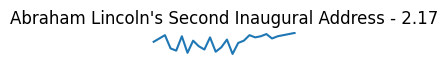

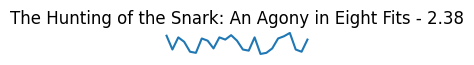

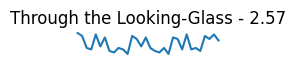

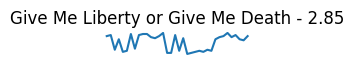

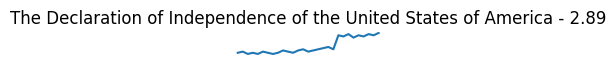

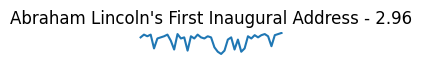

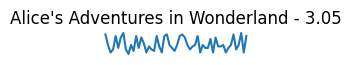

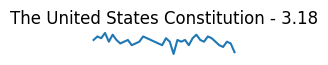

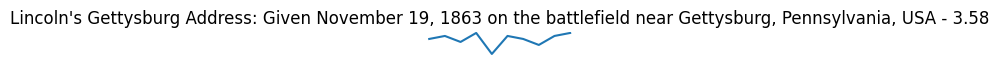

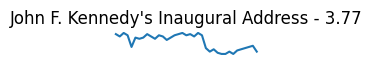

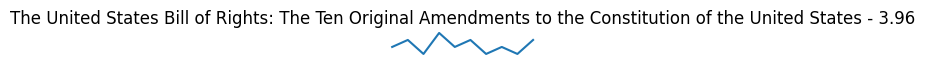

In [44]:
import matplotlib.pyplot as plt
import io
import base64

# Create an empty list to store the HTML table rows
table_rows = []

# Iterate over each tuple in sorted_by_second
for item in sorted_by_second:
    title = item[0]
    distance = item[1]
    array = item[2]

    # Create a matplotlib plot of the array
    fig, ax = plt.subplots(figsize=(2, .3))
    ax.plot(array)
    ax.set_title(title + " - " + str(round(distance, 2)))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)


    # Convert the plot to an image
    buf = io.BytesIO()
    #plt.figure(figsize=(1,1))
    plt.savefig(buf, format='png')
    buf.seek(0)
    plot_img = base64.b64encode(buf.getvalue()).decode('utf-8')

    # Create the HTML table row
    table_row = f"<tr><td>{title}</td><td>{distance}</td><td><img src='data:image/png;base64,{plot_img}'></td></tr>"

    # Append the row to the list of table rows
    table_rows.append(table_row)

# Create the HTML table
html_table = f"<table><tr><th>Title</th><th>Distance</th><th>Plot</th></tr>{''.join(table_rows)}</table>"

# Display the HTML table
html_table


In [7]:
df_books = pd.read_csv("../data/books_final2.csv").iloc[:, 1:]
df_books

,Title,author_name,publish_year,link,emotions,emotion_values,summary
0,"Frankenstein; Or, The Modern Prometheus","Shelley, Mary Wollstonecraft",1824,https://www.gutenberg.org/ebooks/84.txt.utf-8,"['joy', 'curiosity', 'fear', 'joy', 'despair',...","['0.99', '0.6', '-0.9', '0.7', '-1.0', '-0.7',...",['Robert Walton sets out on a voyage to the No...
1,Pride and Prejudice,"Austen, Jane",1796,https://www.gutenberg.org/ebooks/1342.txt.utf-8,"['joy', 'anticipation', 'disgust', 'curiosity'...","['0.8', '0.5', '-0.7', '0.6', '-0.8', '-0.6', ...",['Mrs. Bennet is excited about the prospect of...
2,"Moby Dick; Or, The Whale","Melville, Herman",1855,https://www.gutenberg.org/ebooks/2701.txt.utf-8,"['sadness', 'joy', 'awe', 'fear', 'contentment...","['-0.8', '0.7', '0.6', '-0.9', '0.6', '0.5', '...","['Ishmael, the narrator, describes feeling dep..."
3,Romeo and Juliet,"Shakespeare, William",1590,https://www.gutenberg.org/ebooks/1513.txt.utf-8,"['Anger', 'Anger', 'Disgust', 'Fear', 'Love', ...","['-0.8', '-0.7', '-0.5', '-0.6', '0.9', '0.8',...","['Tybalt kills Mercutio, causing Romeo to seek..."
4,Middlemarch,"Eliot, George",1849,https://www.gutenberg.org/ebooks/145.txt.utf-8,"['joy', 'anticipation', 'anger', 'trust', 'joy...","['0.7', '0.5', '-0.6', '0.8', '0.9', '-0.4', '...","['Dorothea, upon returning home, enters the ro..."
5,"Little Women; Or, Meg, Jo, Beth, and Amy","Alcott, Louisa May",1860,https://www.gutenberg.org/ebooks/37106.txt.utf-8,"['Joy', 'Sadness', 'Hope', 'Contentment', 'Ang...","['0.9', '-0.7', '0.5', '0.6', '-0.5', '0.9', '...",['The March family receives a letter from thei...
6,A Room with a View,"Forster, E. M. (Edward Morgan)",1924,https://www.gutenberg.org/ebooks/2641.txt.utf-8,"['joy', 'disgust', 'trust', 'anger', 'confusio...","['0.7', '-0.8', '0.6', '-0.7', '-0.5', '0.6', ...",['Lucy enjoys playing the piano and feels a se...
7,The Picture of Dorian Gray,"Wilde, Oscar",1877,https://www.gutenberg.org/ebooks/174.txt.utf-8,"['joy', 'joy', 'anticipation', 'trust', 'admir...","['0.7', '0.5', '0.4', '0.3', '0.6', '0.5', '0....",['Dorian expresses joy upon seeing his finishe...
8,The Importance of Being Earnest: A Trivial Com...,"Wilde, Oscar",1877,https://www.gutenberg.org/ebooks/844.txt.utf-8,"['joy', 'anticipation', 'trust', 'anger', 'des...","['0.8', '0.6', '0.75', '-0.7', '0.5', '-0.6', ...",['Jack proposes to Gwendolen and she happily a...
9,Metamorphosis,"Kafka, Franz",1903,https://www.gutenberg.org/ebooks/5200.txt.utf-8,"['disgust', 'confusion', 'fear', 'anger', 'sad...","['-0.8', '-0.5', '-0.7', '-0.6', '-0.4', '-0.6...",['Gregor Samsa wakes up transformed into a gia...
